# 

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#!/usr/bin/env python3
# Import file
data = pd.read_csv('/Users/jaylenroope/Downloads/nba_2008-2025.csv')

data

,season,date,regular,playoffs,away,home,score_away,score_home,q1_away,q2_away,...,ot_home,whos_favored,spread,total,moneyline_away,moneyline_home,h2_spread,h2_total,id_spread,id_total
0,2008,2007-10-30,True,False,por,sa,97,106,26,23,...,0,home,13.0,189.5,900.0,-1400.0,5.0,95.0,0.0,1
1,2008,2007-10-30,True,False,utah,gs,117,96,28,34,...,0,home,1.0,212.0,100.0,-120.0,3.0,105.5,0.0,1
2,2008,2007-10-30,True,False,hou,lal,95,93,16,27,...,0,away,5.0,199.0,-230.0,190.0,3.0,99.0,0.0,0
3,2008,2007-10-31,True,False,phi,tor,97,106,22,28,...,0,home,6.5,191.0,255.0,-305.0,2.0,96.5,1.0,1
4,2008,2007-10-31,True,False,wsh,ind,110,119,23,22,...,16,away,1.5,203.5,-125.0,105.0,1.0,105.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23113,2025,2025-06-11,False,True,okc,ind,107,116,32,28,...,0,away,4.5,225.5,NaN,NaN,NaN,NaN,0.0,0
23114,2025,2025-06-13,False,True,okc,ind,111,104,34,23,...,0,away,6.5,227.5,NaN,NaN,NaN,NaN,1.0,0
23115,2025,2025-06-16,False,True,ind,okc,109,120,22,23,...,0,home,8.5,223.5,NaN,NaN,NaN,NaN,1.0,1
23116,2025,2025-06-19,False,True,okc,ind,91,108,25,17,...,0,away,5.5,222.5,NaN,NaN,NaN,NaN,0.0,0


In [3]:
# I want to take data from after 2020 so we can see how if the algorithm has improved in the last 5 years. A scatterplot of spread vs actual score difference would be a good start. 

data_filtered = data[data['season'] >= 2020] 


# Return a new dataframe with only the columns 'away', 'home', 'score_away', 'score_home', and 'spread'
data_spread = data_filtered[['season','away', 'home', 'score_away', 'score_home', 'spread', 'whos_favored']]
data_spread


,season,away,home,score_away,score_home,spread,whos_favored
15521,2020,no,tor,122,130,6.5,home
15522,2020,lal,lac,102,112,3.5,away
15523,2020,det,ind,119,110,7.0,home
15524,2020,cle,orl,85,94,9.5,home
15525,2020,chi,cha,125,126,3.5,away
...,...,...,...,...,...,...,...
23113,2025,okc,ind,107,116,4.5,away
23114,2025,okc,ind,111,104,6.5,away
23115,2025,ind,okc,109,120,8.5,home
23116,2025,okc,ind,91,108,5.5,away


In [4]:
# I am creating a scatterplot of the spread vs the actual score difference to see if the sports betting algorithm has improved since 2020. Using the 'score_away', 'score_home', 'spread', and 'whos_favored' columns from the data_spread dataframe, I need to create a new column called actual_score_diff that is the difference between the away and home scores. However, the 'spread' doesn't specify which team is favored, so I need to use the 'whos_favored' column to determine which team is favored and adjust the actual_score_diff accordingly. If the 'whos_favored' column is 'away', then I will do score_away - score_home. If the 'whos_favored' column is 'home', then I will do score_home - score_away

def score_diff(row):
    if row['whos_favored'] == 'away':
        return row['score_away'] - row['score_home']
    elif row['whos_favored'] == 'home':
        return row['score_home'] - row['score_away']
    
data_spread['actual_score_diff'] = data_spread.apply(score_diff, axis=1)
data_score_diff = data_spread[['season', 'away', 'home', 'score_away', 'score_home', 'whos_favored','spread', 'actual_score_diff']]
data_score_diff

/var/folders/sq/lfj42cd94g3blqg9ggm6dy880000gn/T/ipykernel_12300/3587686114.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spread['actual_score_diff'] = data_spread.apply(score_diff, axis=1)


,season,away,home,score_away,score_home,whos_favored,spread,actual_score_diff
15521,2020,no,tor,122,130,home,6.5,8
15522,2020,lal,lac,102,112,away,3.5,-10
15523,2020,det,ind,119,110,home,7.0,-9
15524,2020,cle,orl,85,94,home,9.5,9
15525,2020,chi,cha,125,126,away,3.5,-1
...,...,...,...,...,...,...,...,...
23113,2025,okc,ind,107,116,away,4.5,-9
23114,2025,okc,ind,111,104,away,6.5,7
23115,2025,ind,okc,109,120,home,8.5,11
23116,2025,okc,ind,91,108,away,5.5,-17


In [5]:
# Calculating how points off the spread was from the actual_score_diff and creating a new column called points_off_spread
data_score_diff['points_off_spread'] = data_score_diff['spread'] - data_score_diff['actual_score_diff'] 
data_score_diff

/var/folders/sq/lfj42cd94g3blqg9ggm6dy880000gn/T/ipykernel_12300/3749932083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_score_diff['points_off_spread'] = data_score_diff['spread'] - data_score_diff['actual_score_diff']


,season,away,home,score_away,score_home,whos_favored,spread,actual_score_diff,points_off_spread
15521,2020,no,tor,122,130,home,6.5,8,-1.5
15522,2020,lal,lac,102,112,away,3.5,-10,13.5
15523,2020,det,ind,119,110,home,7.0,-9,16.0
15524,2020,cle,orl,85,94,home,9.5,9,0.5
15525,2020,chi,cha,125,126,away,3.5,-1,4.5
...,...,...,...,...,...,...,...,...,...
23113,2025,okc,ind,107,116,away,4.5,-9,13.5
23114,2025,okc,ind,111,104,away,6.5,7,-0.5
23115,2025,ind,okc,109,120,home,8.5,11,-2.5
23116,2025,okc,ind,91,108,away,5.5,-17,22.5


In [6]:
# Grouping the data by season and calculating the mean points_off_spread for each season
data_season = data_score_diff['points_off_spread'].groupby(data_score_diff['season']).mean().reset_index()

data_season

,season,points_off_spread
0,2020,0.815236
1,2021,-0.153715
2,2022,0.058289
3,2023,0.821591
4,2024,0.122062
5,2025,0.137396


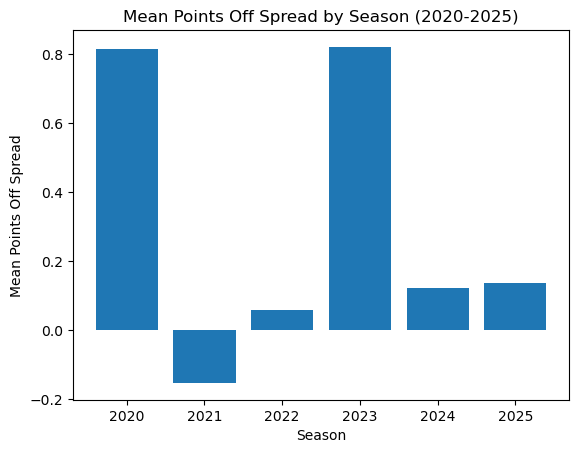

In [7]:
# Using matplotlib to create a bar chart of the mean points_off_spread for each season
plt.bar(data_season['season'], data_season['points_off_spread'])
plt.xlabel('Season')
plt.ylabel('Mean Points Off Spread')
plt.title('Mean Points Off Spread by Season (2020-2025)')
plt.show()
# What this shows is that the sports betting algorithm has improved since 2020, where the average points off the spread was 0.82 in 2020 to 0.14 in 2025. In 2022, the algorithm predicted the score differential very well with a differential of only 0.06. However, overall, the algorithm tends to overestimate the spread.

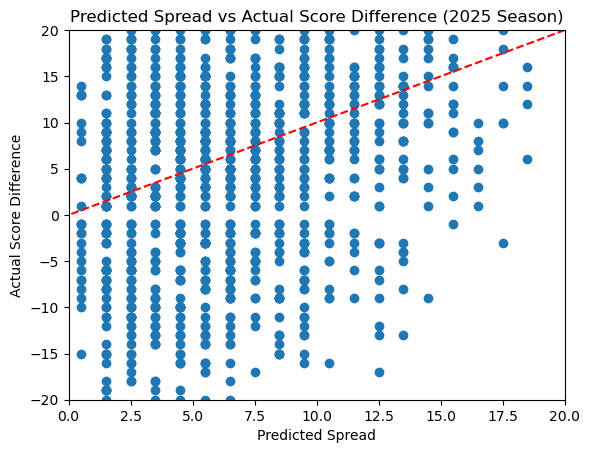

In [8]:
# Creating a scatterplot of predicted spread vs actual score difference. This is only for the 2025 season. A dotted line will go through the origin with a slope of 1 to represent perfect prediction.
data_2025 = data_score_diff[data_score_diff['season'] == 2025]
plt.scatter(data_2025['spread'], data_2025['actual_score_diff'])
plt.plot([-20, 20], [-20, 20], 'r--') # line through origin with slope of 1
plt.xlim(0, 20)
plt.ylim(-20, 20)
plt.xlabel('Predicted Spread')
plt.ylabel('Actual Score Difference')
plt.title('Predicted Spread vs Actual Score Difference (2025 Season)')
plt.show()

In [10]:
# Installing seaborn in this kernel
import sys
print(sys.executable)

/opt/anaconda3/envs/stock_performance/bin/python


In [11]:
!{sys.executable} -m pip install seaborn


In [ ]:
# Finding the actual score difference for each team. A vertical bar chart would be a good way to visualize this, ranking teams with the highest difference at the top. Whenever any instance of the team, doesn't matter if they were favored or not, I will take the points_off_spread value so that means 2 teams will have the same points_off_spread value for each game. This will show which teams are consistently being overvalued or undervalued by the sports betting algorithm.
# Each line of code will be explained in the comments
data_teams = data_score_diff[['away', 'home', 'points_off_spread']] # Creating a new dataframe with only the columns 'away', 'home', and 'points_off_spread'
data_teams_melted = pd.melt(data_teams, id_vars=['points_off_spread'], value_vars=['away', 'home'], var_name='team_type', value_name='team') # Melting the dataframe so that there is only one column for team names and another column for points_off_spread
data_teams_grouped = data_teams_melted.groupby('team')['points_off_spread'].mean().reset_index() # Grouping the data by team and calculating the mean points_off_spread for each team
data_teams_sorted = data_teams_grouped.sort_values(by='points_off_spread', ascending=False)
data_teams_sorted




,team,points_off_spread
7,den,1.422868
26,sac,1.391892
13,lal,1.378788
17,min,1.177800
11,ind,1.054808
0,atl,1.002988
15,mia,0.969314
1,bkn,0.924547
6,dal,0.618868
8,det,0.545551


/var/folders/sq/lfj42cd94g3blqg9ggm6dy880000gn/T/ipykernel_12300/3200368028.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='points_off_spread', y='team', data=data_teams_sorted, palette='viridis')


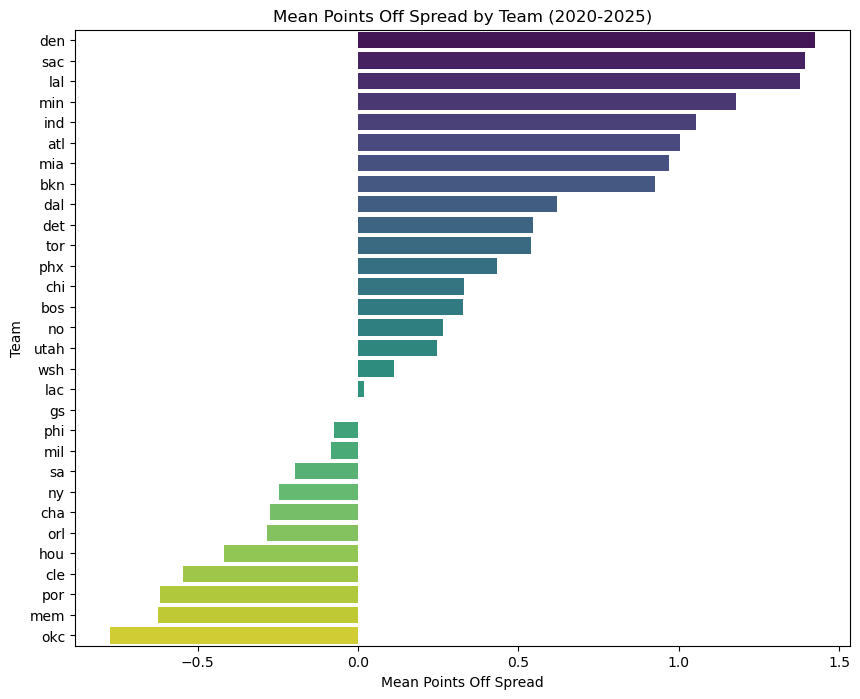

In [ ]:
# Creating the bar chart using seaborn for more appealing visualizations
import seaborn as sns
plt.figure(figsize=(10,8))
sns.barplot(x='points_off_spread', y='team', data=data_teams_sorted, palette='viridis')
plt.xlabel('Mean Points Off Spread')
plt.ylabel('Team')
plt.title('Mean Points Off Spread by Team (2020-2025)')
plt.show()

# Should I label the bars with their exact values? It might make it too cluttered. Maybe only label the top 5 and bottom 5 teams?
for index, value in enumerate(data_teams_sorted['points_off_spread']):
    if index < 5 or index >= len(data_teams_sorted) - 5:  # Only label the top 5 and bottom 5 teams
        plt.text(value, index, f'{value:.2f}', va='center')
plt.figure(figsize=(10,8))
sns.barplot(x='points_off_spread', y='team', data=data_teams_sorted, palette='viridis')
plt.xlabel('Mean Points Off Spread')
plt.ylabel('Team')
plt.title('Mean Points Off Spread by Team (2020-2025)')         
plt.show()      


/var/folders/sq/lfj42cd94g3blqg9ggm6dy880000gn/T/ipykernel_12300/2110629089.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='points_off_spread', y='team', data=data_teams_above_0, palette='Reds', ax=ax1)
/var/folders/sq/lfj42cd94g3blqg9ggm6dy880000gn/T/ipykernel_12300/2110629089.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='points_off_spread', y='team', data=data_teams_below_0, palette='Blues', ax=ax2)


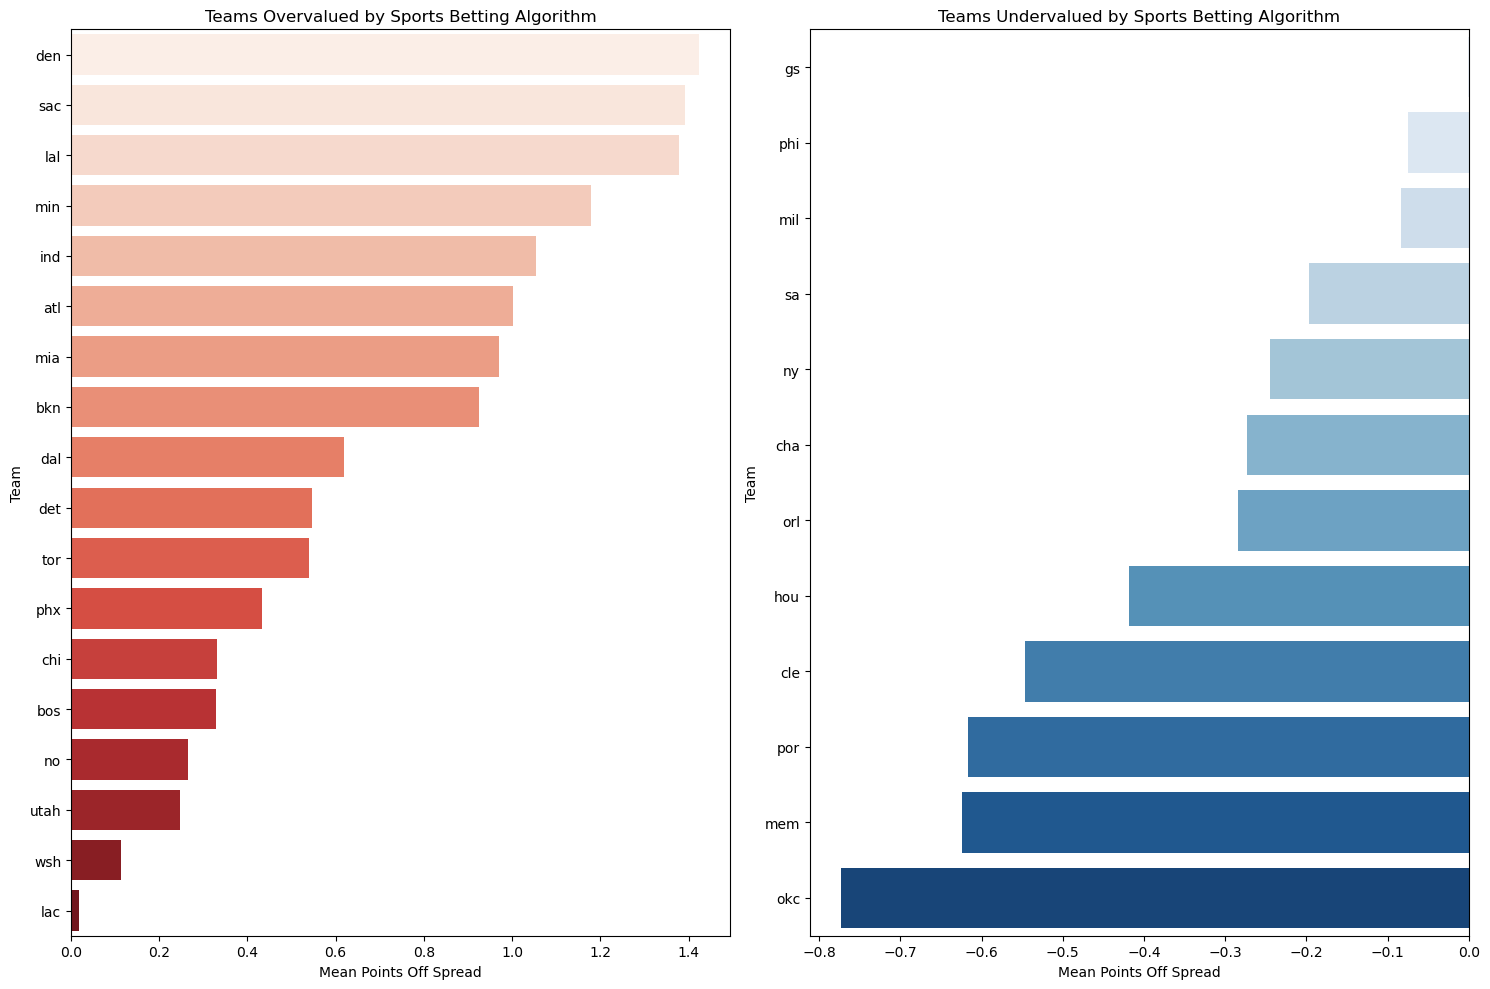

In [18]:
# How I make a subplots where there is a bar chart for only teams that are above 0 and another bar chart for only teams that are below 0
data_teams_above_0 = data_teams_sorted[data_teams_sorted['points_off_spread'] > 0]
data_teams_below_0 = data_teams_sorted[data_teams_sorted['points_off_spread'] < 0]  

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
sns.barplot(x='points_off_spread', y='team', data=data_teams_above_0, palette='Reds', ax=ax1)
ax1.set_title('Teams Overvalued by Sports Betting Algorithm')
ax1.set_xlabel('Mean Points Off Spread')
ax1.set_ylabel('Team')
sns.barplot(x='points_off_spread', y='team', data=data_teams_below_0, palette='Blues', ax=ax2)
ax2.set_title('Teams Undervalued by Sports Betting Algorithm')
ax2.set_xlabel('Mean Points Off Spread')
ax2.set_ylabel('Team')
plt.tight_layout()
plt.show()



In [ ]:
# Doing the same thing for total points predicted vs actual total points scored in the game and seeing how that has changed over the years.

data_total_points = data_filtered[['season','away', 'home', 'score_away', 'score_home', 'total']]

data_total_points['actual_total_points'] = data_total_points['score_away'] + data_total_points['score_home']

data_total_points_updated = data_total_points[['season', 'away', 'home', 'score_away', 'score_home', 'total', 'actual_total_points']]

data_total_points_updated

/var/folders/sq/lfj42cd94g3blqg9ggm6dy880000gn/T/ipykernel_118/2076915050.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_total_points['actual_total_points'] = data_total_points['score_away'] + data_total_points['score_home']


,season,away,home,score_away,score_home,total,actual_total_points
15521,2020,no,tor,122,130,229.5,252
15522,2020,lal,lac,102,112,224.0,214
15523,2020,det,ind,119,110,211.0,229
15524,2020,cle,orl,85,94,211.5,179
15525,2020,chi,cha,125,126,216.5,251
...,...,...,...,...,...,...,...
23113,2025,okc,ind,107,116,225.5,223
23114,2025,okc,ind,111,104,227.5,215
23115,2025,ind,okc,109,120,223.5,229
23116,2025,okc,ind,91,108,222.5,199


In [ ]:
# Subtracting toal by actual_total_points to get points off total and creating a new column called points_off_total
data_total_points_updated['points_off_total'] = data_total_points_updated['total'] - data_total_points_updated['actual_total_points']

data_total_points_updated

# Grouping the data by season and calculating the mean points_off_total for each season
data_total_season = data_total_points_updated['points_off_total'].groupby(data_total_points_updated['season']).mean().reset_index()

data_total_season

,season,points_off_total
0,2020,-1.091426
1,2021,0.011529
2,2022,-0.011338
3,2023,-0.804924
4,2024,-0.115618
5,2025,-0.753596


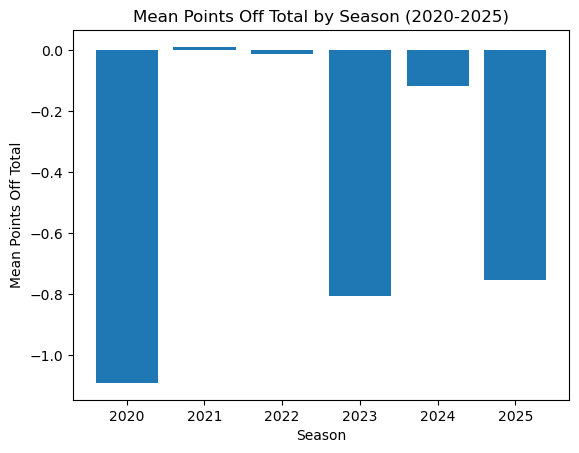

In [ ]:
# Plotting the mean points_off_total for each season using matplotlib
plt.bar(data_total_season['season'], data_total_season['points_off_total'])
plt.xlabel('Season')
plt.ylabel('Mean Points Off Total')
plt.title('Mean Points Off Total by Season (2020-2025)')
plt.show()
# Since 2020, the algorithm has consistently underestimated the total points scored in a game, except in 2021 where the algorithm predicted the point total 0.01 points off on average. 2020 was the worst year for predicting the score total, where they were incorrect of the actual score by over one point on average. 